In [124]:
using PyPlot,JLD
include("../src/barycenters.jl")

  likely near /Users/chizat/Documents/Code/optimal-transport/src/barycenters.jl:480
  likely near /Users/chizat/Documents/Code/optimal-transport/src/barycenters.jl:52


barycenter (generic function with 1 method)

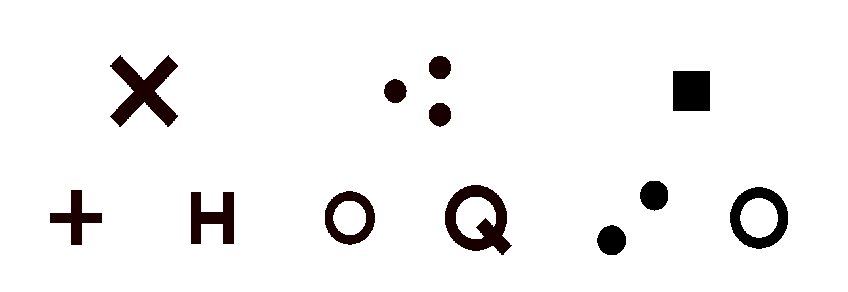

In [119]:
S = 3 # number of marginals
N1,N2 = 512,512 # discretization of the domain

p = fill(zeros(N1,N2),S)
X1, X2 = linspace(0,1,N1), linspace(0,1,N2)#plus .2; times .3 donut .05 trio .12
fplus(x1,x2,p1,p2,s) = ((-.09*s<x1-p1<.09*s)&&(-.45*s<x2-p2<.45*s))||((-.45*s<x1-p1<.45*s)&&(-.09*s<x2-p2<.09*s))
ftimes(x1,x2,p1,p2,s)= ((-.07*s<x2+x1-p1-p2<.07*s)&&(-.4*s<x1-x2-p1+p2<.4*s))||((-.4*s<x2+x1-p1-p2<.4*s)&&(-.07*s<x1-x2-p1+p2<.07*s))
fdonut(x1,x2,p1,p2,s)= (.65*s < norm([x1-p1,x2-p2]) < s)
ftrio(x1,x2,p1,p2,s) = (norm([x1-p1-s/2,x2-p2-s/2]) < s/4)||(norm([x1-p1+s/2,x2-p2-s/2]) < s/4)||(norm([x1-p1,x2-p2+s/2]) < s/4)
fduo(x1,x2,p1,p2,s)  = (norm([x1-p1-s/2,x2-p2-s/2]) < s/3)||(norm([x1-p1+s/2,x2-p2+s/2]) < s/3)
fsquare(x1,x2,p1,p2,s)=(-s/3<x1-p1<s/3)&&(-s/3<x2-p2<s/3)
fH(x1,x2,p1,p2,s)= ((-.4*s<x2-p2<-.2*s)&&(-.45*s<x1-p1<.45*s))||((.2*s<x2-p2<.4*s)&&(-.45*s<x1-p1<.45*s))||((-.2*s<x2-p2<.2*s)&&(-.1*s<x1-p1<.1*s))
fQ(x1,x2,p1,p2,s)= (.65*s < norm([x1-p1,x2-p2]) < s)||((-.3*s<x2+x1-p1-p2<.3*s)&&(-2.*s<x1-x2-p1+p2<-.3*s))

p[1] = Float64[fH(x1,x2,0.2,0.85,.28) + ftimes(x1,x2,0.82,0.5,.75) + fplus(x1,x2,0.2,0.15,.3) for x1 in X1, x2 in X2]
p[2] = Float64[fQ(x1,x2,0.2,0.8,.16) + ftrio(x1,x2,0.82,0.5,.23) + fdonut(x1,x2,0.2,0.15,.13) for x1 in X1, x2 in X2]
p[3] = Float64[fdonut(x1,x2,0.2,0.85,.15) + fsquare(x1,x2,0.82,0.5,.29) + fduo(x1,x2,0.2,0.2,.22) for x1 in X1, x2 in X2]

# rescale or don't
for s=1:S;   p[s]= p[s]/sum(p[s]);end
vm = maximum([maximum(p[1]);maximum(p[2]);maximum(p[3])])

figure(figsize=[10,3]);
subplot(131); pcolormesh(p[1],cmap="afmhot_r",vmax=vm,vmin=0); axis("off");
subplot(132); pcolormesh(p[2],cmap="afmhot_r",vmax=vm,vmin=0); axis("off");
subplot(133); pcolormesh(p[3],cmap="afmhot_r",vmax=vm,vmin=0); axis("off");

In [97]:
#save("../output/barycenters/marginals.jld","m1",p[1],"m2",p[2],"m3",p[3])

In [128]:
## ϵ = 1e-5
α0 = ([1;3;0], [0;3;1], [2;2;0], [1;2;1],[0;2;2],[3;1;0],[2;1;1],[1;1;2],[0;1;3],[3;0;1],[2;0;2],[1;0;3],[1;1;1])
λ = Inf
for i=1:length(α0)
    @show α0[i]
    p0 = cat(2,p[1][:],p[2][:],p[3][:])
    α = [α0[i][1];α0[i][2];α0[i][3]]
    if α0[i][3]==0
        p0=cat(2,p[1][:],p[2][:])
        α = [α[1];α[2]]
    elseif α0[i][2]==0
        p0=cat(2,p[1][:],p[3][:])
        α = [α[1];α[3]]
    elseif α0[i][1]==0
        p0=cat(2,p[2][:],p[3][:])
        α = [α[2];α[3]]
    end
    #@time h,K = barycenter(p0,λ,α/sum(α),2,ϵ; niter=300,epsstep=5., tol=0.);
    #bary = reshape(h,N1,N2)
    #pcolormesh(bary,cmap="bone_r");axis("off")
    #save("../output/barycenters/baryGHK$(α0[i][1])$(α0[i][2])$(α0[i][3]).jld","bary",bary)
end
p0 = cat(2,p[1][:],p[2][:])
#p0 = zeros(p0)
#p0[2:5,1] = 1;
#p0[end-10:end-1,2] = 1;
@time h,K = barycenter(p0,0.11,[1/2;1/2],2,1.0; niter=300,epsstep=5., tol=0.);

α0[i] = [1,3,0]
α0[i] = [0,3,1]
α0[i] = [2,2,0]
α0[i] = [1,2,1]
α0[i] = [0,2,2]
α0[i] = [3,1,0]
α0[i] = [2,1,1]
α0[i] = [1,1,2]
α0[i] = [0,1,3]
α0[i] = [3,0,1]
α0[i] = [2,0,2]
α0[i] = [1,0,3]
α0[i] = [1,1,1]
(scales[k],epsvec[k],nitervec[k],tolvec[k]) = (4,1.0,250,0.0)
  3.504733 seconds (33.60 M allocations: 1.866 GB, 11.66% gc time)
(scales[k],epsvec[k],nitervec[k],tolvec[k]) = (4,0.1,250,0.0)
  0.842926 seconds (6.82 M allocations: 477.629 MB, 7.43% gc time)
(scales[k],epsvec[k],nitervec[k],tolvec[k]) = (4,0.01,250,0.0)
  0.999896 seconds (10.21 M allocations: 657.269 MB, 8.77% gc time)
(scales[k],epsvec[k],nitervec[k],tolvec[k]) = (4,0.005,250,0.0)
  0.868770 seconds (6.82 M allocations: 477.629 MB, 7.61% gc time)
(scales[k],epsvec[k],nitervec[k],tolvec[k]) = (4,0.001,250,0.0)
  1.034921 seconds (9.40 M allocations: 614.440 MB, 8.22% gc time)
(scales[k],epsvec[k],nitervec[k],tolvec[k]) = (4,0.0005,250,0.0)
  0.879614 seconds (5.05 M allocations: 383.761 MB, 6.32% gc time)
(scales[k

In [130]:
NN = map(Int,sqrt(size(h,1)))
bary3 = reshape(h,NN,NN);

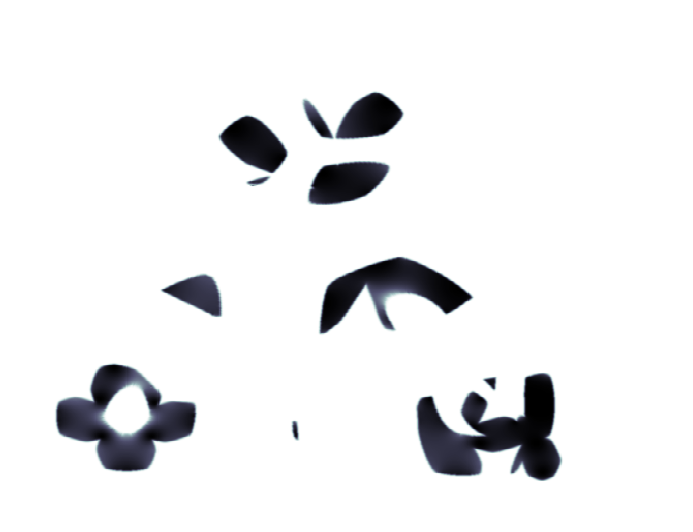

(0.0,600.0,0.0,600.0)

In [123]:
g =[1/2;1/2]
pcolormesh(min(bary,6e-5),cmap="bone_r");axis("off")

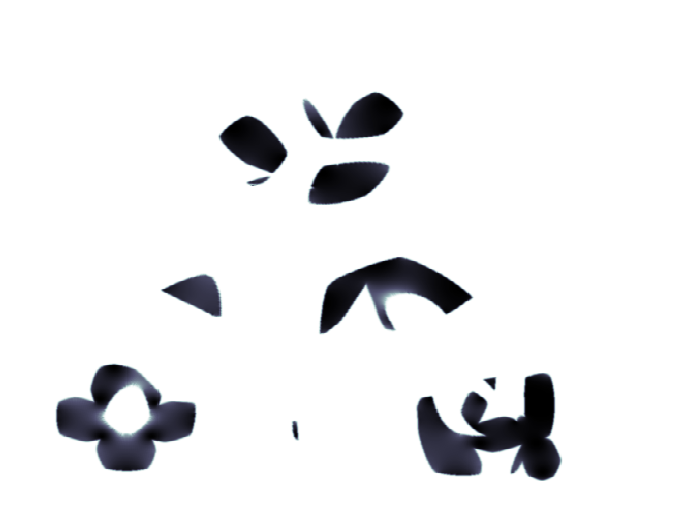

(0.0,600.0,0.0,600.0)

In [127]:
g =[1/2;1/2]
pcolormesh(min(bary2,6e-5),cmap="bone_r");axis("off")

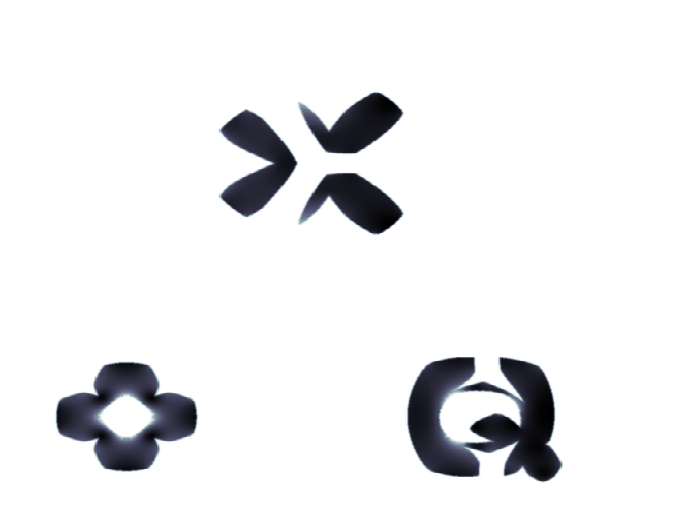

(0.0,600.0,0.0,600.0)

In [131]:
g =[1/2;1/2]
pcolormesh(min(bary3,6e-5),cmap="bone_r");axis("off")

In [90]:
h,s,u,ϵ, α, λ = Array{Float64}(1), 2, Inf, 1.,1., 1. 
baryKL!(h,s,u,ϵ,α,λ)

1-element Array{Float64,1}:
 NaN

In [ ]:
(((s.^(ϵ/(ϵ+λ)).*exp(-!isinf(u).*u/(ϵ+λ))))*α).^((ϵ+λ)/ϵ)

In [94]:
-(!isinf(u).*u)

-0.0

In [228]:
nnz(K[1])/length(K[1])
#size(K[1])

0.00014832821034360677

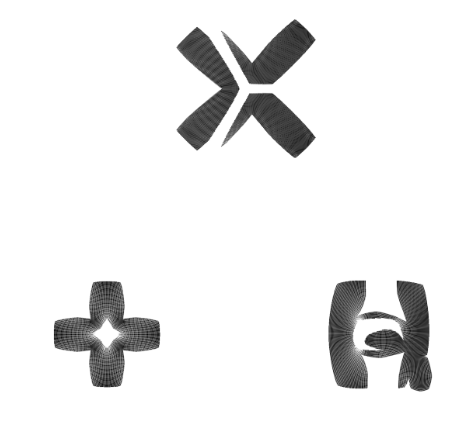

In [117]:
b=load("../output/barycenters/GHK2d_data/baryGHK310.jld")
B=b["bary"]
figure(figsize=(5.12, 5.12), dpi=100,frameon="false")

imshow(flipdim(min(B,4e-5),1),cmap="gray_r"); axis("off")
#savefig("../output/barycenters/m3.png")
savefig("../output/barycenters/baryGHK310.png", dpi=100)